# Constructing an Alzheimer's Detector 

### Table of Contents

[A. Introduction](#A.-Introduction)

[B. Data Set Information](#B.-Data-Set-Information)

[1. Libraries Libraries and Data](#1.-Imported-Libraries-and-Data)

[2. Data Preprocessing](#2.-Data-Preprocessing)

[3. Methods](#3.-Methods)

[4. Results](#4.-Results)

[5. Discussion](#5.-Discussion)

[6. Limitations](#6.-Limitations)

[7. References](#7.-References)

### A. Introduction

Alzhiemer's disease is the most common cause of dementia, which is a term used to describe memory loss and other cognritive decline daily life. Alzheimer's disease is a progressive disease which means the dementia symptoms worsen over years. Currently, Alzheimer's disease is the sixth leading cause of death in the US. Early detection and diagnosis of Alzheimer's is very important because early intervention might slow disease progression and an opportunity to plan for the future. 

The goal of this project is to attempt to develop a ML model that can help detect Alzheimer's disease early. 

From this project, I hope to grasp a firm understanding of applying ML techniques to real-life problems. 

#### Literature Review

Previously, SVM algorithm was used to predict Alzheimer's but it takes a long time to run. A study shown by P. Kishore et al.(2) illustrated in their findings that their highest performing model is SVM using Linear Kernel with a C value of 2.This study also used longitudinal data from the OASIS dataset. 

Another study conducted by Gopi Battineni et al.(3) also used longitudinal data from OASIS as well as data from the Alzheimer Disease Research Centre (ADRC). These researchers came to the conclusion that Random Forest classifier had the highest accuracy for classification while SVM was the lowest. 

#### Hypothesis

Literature review shows some conflicating information, I hope to do further investigation to come to a clearer understanding. I believe the best performing classifier will be the SVM classifier because it can be good to use with two classes. It is also supported by the study by Kishore using only the OASIS dataset. 

### B. Data Set Information

#### B.1 OASIS: Open Access Series of Imaging Studies

This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit. (4)

#### B.2 Column Descriptions

<pre>
- <b>Subject ID:</b> unique code assigned to each subject in the study
- <b>MRI ID:</b> unique code assigned to each MRI scan
- <b>Group:</b> subject classified under one of the three of the following
    - Nondemented
    - Demented 
    - Converted: intially grouped "Nondemented" and later "Demented"
- <b>Visit:</b> Visit number for patient

Demographics 
- <b>M/F:</b> patient gender
- <b>Hand:</b> handedness (all patients were right-handed)
- <b>Age:</b> age of patient in years
- <b>EDUC:</b> years of education
- <b>SES:</b> Socioeconomic status measured 1 (highest) to 5 (lowest)

Clinical Data
- <b>MMSE:</b> Mini Mental State Examination score
    - Scores range from 0 (worst) to 30 (best)
    - Scoring 30 doesn't completely rule out dementia
    - 24-30 = normal
    - 19-23 = mild
    - 10-18 = moderate
    - 0-9 = severe
- <b>CDR:</b> Clinical Dementia Rating
    - 0 = no dementia
    - 0.5 = very mild dementia
    - 1 = mild dementia
    - 2 = moderate dementia
    - 3 = severe dementia
- <b>eTIV:</b> estimated total intercranial volume
    - measured in mm^3
- <b>nWBV:</b> normalized whole-brain volume
- <b>ASF:</b> atlas scaling factor
    - Volume-scaling factor to match subject to atlas target
    - Used to correct for head size variation
    
</pre>

### 1. Imported Libraries and Data

#### 1.1 Libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")

from statistics import mean
from sklearn.utils import resample
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from google.colab import files

from scipy import stats
!pip install scikit_posthocs
from scikit_posthocs import posthoc_nemenyi_friedman

!pip install shap
import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 43 kB 671 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=0192f23ee4d4adf8a5d02ee2f47f9430d2f3979dead88fc59f7e6c5b724ac619
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 564 kB 6.6 MB/s 


#### 1.2 Parkinson's data set

In [ ]:
#uploaded = files.upload()

df = pd.read_csv("oasis_longitudinal.csv")
df.head()

FileNotFoundError: ignored

### 2. Data Preprocessing

In [ ]:
#Check if dtypes are suitable
#I want to convert SES and CDR to string for categorical 
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [ ]:
#Check missing for missing data
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#### 2.1 Missing value imputation

##### 2.1.1 MMSE

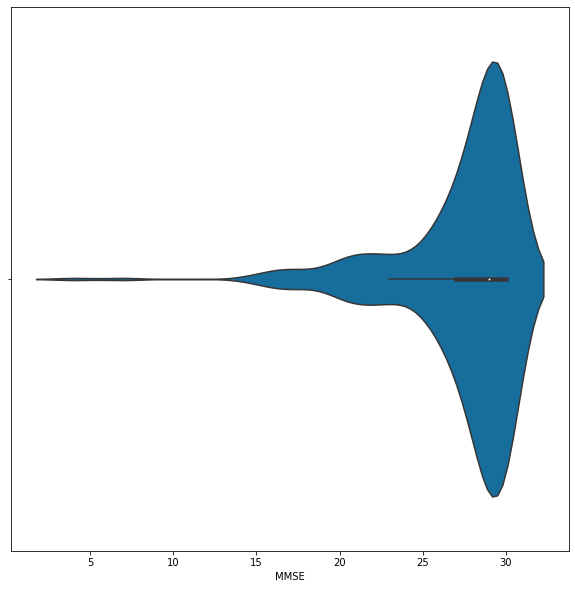

In [ ]:
#Check distribution of MMSE data

fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(df.MMSE)

In [ ]:
#Data is skewed so mean imputation is a bad idea
#I'll use median imputer to fill missing values of MMSE

median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")

median_imputer.fit(df[["MMSE"]])

df[["MMSE"]] = median_imputer.fit_transform(df[["MMSE"]])

df[["MMSE"]].isna().sum()

MMSE    0
dtype: int64

##### 2.1.2 SES missing value imputation

In [ ]:
#SES should be categorical but currently a float datatype. 
#I will fill with max value before converting to string
df['SES'].fillna(df['SES'].value_counts().idxmax(),inplace=True)

In [ ]:
df.SES.value_counts()

2.0    122
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [ ]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#### 2.2 Characteristic configuration

In [ ]:
#SES and CDR are categorical, should be string
df['SES']=df['SES'].astype('str')
df['CDR']=df['CDR'].astype('str')
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES            object
MMSE          float64
CDR            object
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [ ]:
### Change "Converted" data to "Demented" to create a binary class

df["Group"].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [ ]:
df = df.replace("Converted","Demented")
print(df["Group"].value_counts())

Nondemented    190
Demented       183
Name: Group, dtype: int64


In [ ]:
#Subject ID, MRI ID, MR Delay, and Visit columns are unnecessary so they will be dropped

df.drop(['Subject ID','MRI ID','MR Delay','Visit'],axis=1,inplace=True)
df.columns

Index(['Group', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

In [ ]:
#Entire dataset is right-handed so I will drop this row

print(df[["Hand"]].value_counts())
df = df.drop("Hand",axis=1)
df.columns

Hand
R       373
dtype: int64


Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [ ]:
df.duplicated().any()

False

#### 2.3 Dataset shape and characteristics

In [ ]:
#split columns into numerical and categorical data for investigation
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a46daad0>,
      dtype=object)

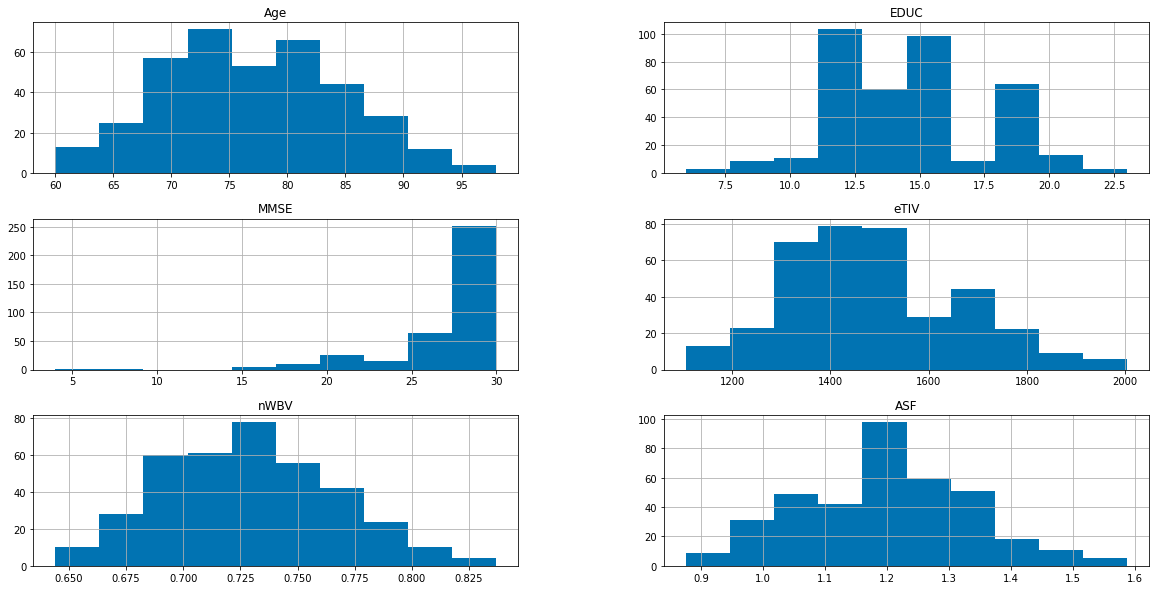

In [ ]:
#Some data is skewed (nWBV and EDUC)
df[num_cols].hist(figsize=(20,10))

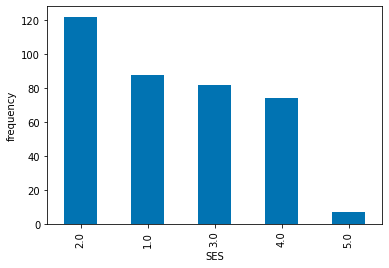

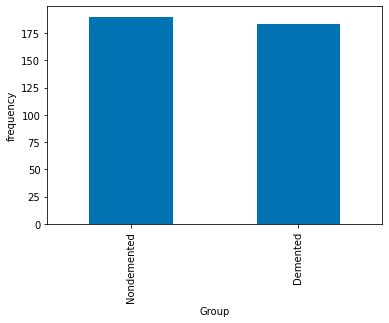

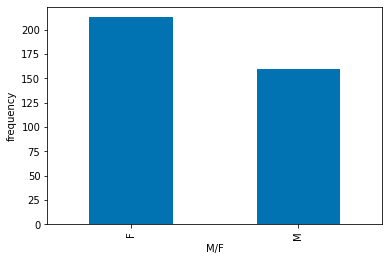

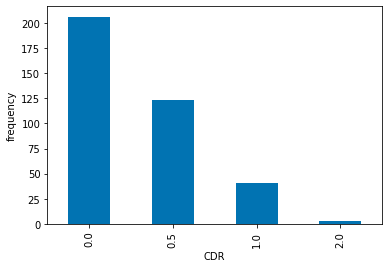

In [ ]:
#CDR and SES are skewed, surprising how SES isn't skewed closer to 1
#Because older people may have higher SES

for cat in cat_cols:
    fig, ax = plt.subplots()
    df[cat].value_counts().plot(ax=ax, kind='bar', xlabel=cat, ylabel='frequency')
    plt.show()

#### 2.4 Outlier Handling

##### Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a3f09250>,
      dtype=object)

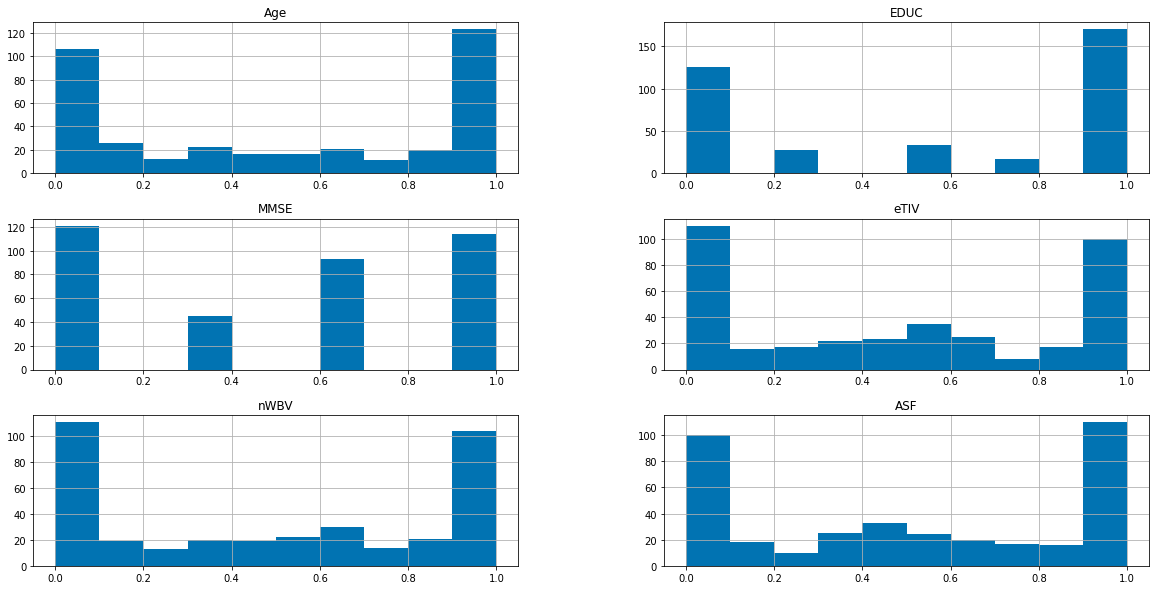

In [ ]:
#cap outliers with quantiles (25% < x <75%)

for col in num_cols:
    upper_lim = df[col].quantile(.75)
    lower_lim = df[col].quantile(.25)
    df.loc[(df[col] > upper_lim),col] = upper_lim
    df.loc[(df[col] < lower_lim),col] = lower_lim
    
#Log transform
for col in num_cols:
    df[col] = (df[col]+1).transform(np.log)

#MinMax scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[num_cols])

df[num_cols] = scaler.transform(df[num_cols])

#Plot
df[num_cols].hist(figsize=(20,10))

#### 2.5 Compare column relationships between demented and nondemented datasets

In [ ]:
#Split data into input and output
X = df.iloc[:,1:]
y = df.iloc[:,0]

print("dataframe shape: ", df.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

dataframe shape:  (373, 10)
X shape:  (373, 9)
y shape:  (373,)


In [ ]:
#array to dataframe
x = pd.DataFrame(df,columns=X.columns)

In [ ]:
#Find index of demented and nondemented values

non_index = y.index[y == 'Nondemented']
demented_index = y.index[y == 'Demented']

print(len(non_index),len(demented_index))

190 183


In [ ]:
### Split dataset into nondemented and demented

#demented split
xd = x.iloc[demented_index]
print("demented df shape: ", xd.shape)

#nondemented split
xn = x.iloc[non_index]
print("nondemented df shape: ", xn.shape)

demented df shape:  (183, 9)
nondemented df shape:  (190, 9)


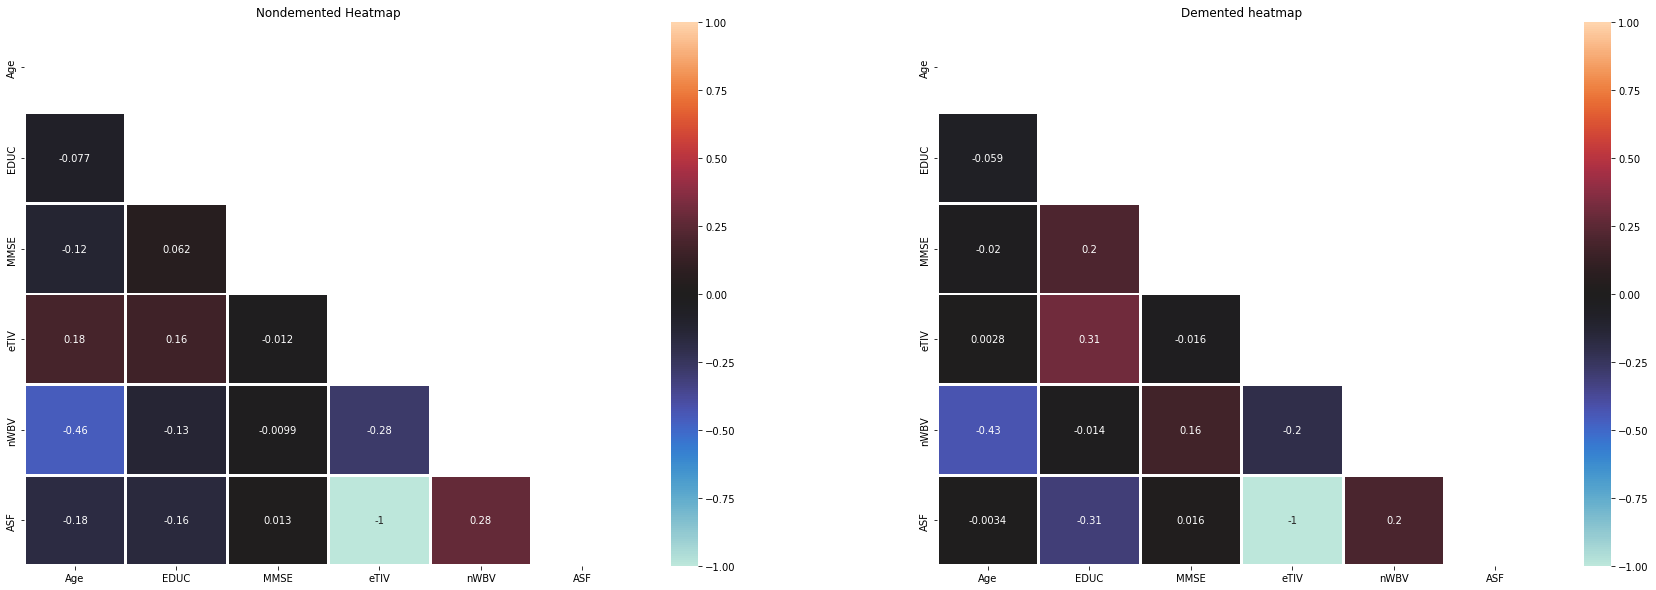

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title("Nondemented Heatmap")

matrix = np.triu(xn.corr())
sns.heatmap(xn.corr(),annot=True,vmin=-1,vmax=1,center=0,linewidths=2,mask=matrix)


plt.subplot(1,2,2)
plt.title("Demented heatmap")

matrix = np.triu(xd.corr())
sns.heatmap(xd.corr(),annot=True,vmin=-1,vmax=1,center=0,linewidths=2,mask=matrix)

In [ ]:
#Filter correlation matrix of nondemented
cn = xn.corr()
cn = cn.unstack()
cn = cn.sort_index()
cn = cn[abs(cn) < 1]

#Filter correlation matrix of demented
cd = xd.corr()
cd = cd.unstack()
cd = cd.sort_index()
cd = cd[abs(cd) < 1]


#iterate through heatmap to find differences in nondemented and demented variables
for i,cor in enumerate(cn):
    dem_col = []
    difference = abs(cor - cd[i])
    
    if difference > 0.2:
        
        if abs(cn[i]) < 0.25 and abs(cd[i]) > 0.25:
            print(cd.index[i])

#It appears there aren't very many significant differences in the numerical 
#relationships of the demented and nondemented groups. 

#### 2.6 Categorical Data Encoding

In [ ]:
#Create dataset of input variables with numerical encoding of categorical data
ddf = pd.get_dummies(x)

In [ ]:
ddf.head()

,Age,EDUC,MMSE,eTIV,nWBV,ASF,M/F_F,M/F_M,SES_1.0,SES_2.0,SES_3.0,SES_4.0,SES_5.0,CDR_0.0,CDR_0.5,CDR_1.0,CDR_2.0
0,1.000000,0.533433,0.000000,1.0,0.000000,0.0,0,1,0,1,0,0,0,1,0,0,0
1,1.000000,0.533433,1.000000,1.0,0.000000,0.0,0,1,0,1,0,0,0,1,0,0,0
2,0.380288,0.000000,0.000000,1.0,0.646566,0.0,0,1,0,1,0,0,0,0,1,0,0
3,0.472232,0.000000,0.344767,1.0,0.235048,0.0,0,1,0,1,0,0,0,0,1,0,0
4,0.828440,0.000000,0.000000,1.0,0.018144,0.0,0,1,0,1,0,0,0,0,1,0,0


### 3. Methods

In [ ]:
#Data points >= 1000, hold out will be used
ddf = ddf.astype(float)
X_train, X_test, y_train, y_test = train_test_split(ddf,y,stratify=y,test_size=0.1,random_state=42)

In [ ]:
#Due to an imbalanced dataset, must use strat kfold

rsFolds=RepeatedStratifiedKFold(n_splits=20, n_repeats=10, random_state=0)

In [ ]:
#Select classifiers for hyperparameter optimization
classifiers = [XGBClassifier(eval_metric='mlogloss'), SVC(), RandomForestClassifier()]

#XGB parameter space
parm_XGB = { 
    'max_depth': [3,6,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.3, 0.7],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda':[0, 0.001, 0.005, 0.01, 0.05]
    }

#SVC parameter space
parm_SVCKernel = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear']
    } 

#RF Parameter space
parm_RF = {
    'max_depth': range(64,129),
    'max_features': ['sqrt'],
    'n_estimators': [100, 500, 1000]
    }

paramatersClassifiers=[parm_XGB,parm_SVCKernel, parm_RF]

In [ ]:
#Split the test to 100 splits of test data

test_splits=[]

for i in range(0,100):
    S,S_y=resample(X_test,y_test,replace=True,random_state=0)
    test_splits.append([S,S_y])

### 4. Results


#### Which is the best model?

In [ ]:
np.random.seed(0)
target_names = ['class 0', 'class 1']
scoresTests=[]
for i in range(0,3):
    print('Classifier_'+str(i)+' --> ',classifiers[i])
    model= RandomizedSearchCV(classifiers[i], paramatersClassifiers[i], scoring='f1_micro', cv=rsFolds, random_state=1)
    model.fit(X_train,y_train)
    print('Best Score: %s' % model.best_score_)
    print('Best Hyperparameters: %s' % model.best_params_)
    y_pred=model.predict(X_train)
    print(classification_report(y_train, y_pred, target_names=target_names))
    scorePerClassifier=[]
    for j in range(0, len(test_splits)):
        y_test_pred=model.predict(test_splits[j][0])
        scorePerClassifier.append(f1_score(test_splits[j][1], y_test_pred, average='micro'))
    print (mean(scorePerClassifier))
    scoresTests.append(scorePerClassifier)   

Classifier_0 -->  XGBClassifier(eval_metric='mlogloss')
Best Score: 0.9427757352941177
Best Hyperparameters: {'reg_lambda': 0.001, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
              precision    recall  f1-score   support

     class 0       0.99      0.98      0.98       164
     class 1       0.98      0.99      0.98       171

    accuracy                           0.98       335
   macro avg       0.98      0.98      0.98       335
weighted avg       0.98      0.98      0.98       335

1.0
Classifier_1 -->  SVC()
Best Score: 0.9434191176470589
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
              precision    recall  f1-score   support

     class 0       0.99      0.90      0.94       164
     class 1       0.91      0.99      0.95       171

    accuracy                           0.94       335
   macro avg       0.95      0.94      0.94       335
weighted avg       0.95      0.94      

In [ ]:
#Friedman test is significant, can conclude one population mean is different from the rest

groups=[scoresTests[i] for i in range(0,len(classifiers))]
chi_square,p_value_mean=stats.friedmanchisquare(*groups)
print(p_value_mean)

3.7200759760208177e-44


In [ ]:
#At an alpha of 0.05, (SVC and XGB) and (SVC and RF) have significanlty different means


trans_groups=np.array(groups).T

p=posthoc_nemenyi_friedman(trans_groups)
print(p)

       0      1      2
0  1.000  0.001  0.900
1  0.001  1.000  0.001
2  0.900  0.001  1.000


#### SHAP Analysis

In [ ]:
svc = SVC(kernel='linear',gamma=0.001,C=10)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.001, kernel='linear')

<BarContainer object of 17 artists>

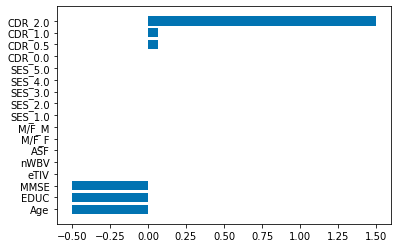

In [ ]:
plt.figsize = (20,20)
sorted_idx = svc.coef_.argsort()[0]
plt.barh(ddf.columns, svc.coef_[0][sorted_idx])

### 5. Discussion


Before addressing the results and metrics of our machine learning models, the topic of under-fitting and over-fitting must be addressed. I believe that the machine learning models that were tested fit the training data well because of the kfold cross validation we did.

The model that had the highest best F1 score on the training dataset was the Random Forest Classifier. And RF classifier had the highest F1 score for the testing dataset. The Friedman Test of the mean F1 scores showed that there is a significant diffence between the 3 classifier populations. The following pairwise posthoc nemenyi friedman shows 2 pairs of significantly different means (SVC and RF) and (SVC and XGB). The common group here is SVC. The statistically significant performer here is SVC which agrees with my hypothesis. It performed slightly lower than Random forest.

As shown from the heatmap and the feature importance plot, it appears categorical data (CDR ratings) had the highest positive values. The negative indicators were MMSE,EDUC, and Age. The importance and role of MMSE and EDUC are understandable. Those who have higher mental state scores (MMSE) and higher education would be nondemented. Age is a little perplexing, since older people in the population are at higher risk. However, over a wider dataset(ages younger than 65 like 20) might adjust that.

An interesting finding is that the MRI and image related results didn't have a high feature importance. 

### 6. Limitations

I believe testing other machine learning algorithms would be an improvement. Also I would hope that widening the data from the patient population help with model performance but it may be hard to find dementia data in the younger population, perhaps lowering the age to include to 50 years would help. 

### 7. References

#### 1. 
Marcus, D. S., Fotenos, A. F., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2010). Open access series of imaging studies: longitudinal MRI data in nondemented and demented older adults. Journal of cognitive neuroscience, 22(12), 2677-2684.

#### 2.  
Kishore, P., Kumari, C. U., Kumar, M. N. V. S. S., & Pavani, T. (2021). Detection and analysis of Alzheimer’s disease using various machine learning algorithms. Materials Today: Proceedings, 45, 1502-1508.

#### 3.
Battineni, G., Hossain, M. A., Chintalapudi, N., Traini, E., Dhulipalla, V. R., Ramasamy, M., & Amenta, F. (2021). Improved Alzheimer’s Disease Detection by MRI Using Multimodal Machine Learning Algorithms. Diagnostics, 11(11), 2103.

####4.
Daniel S. Marcus, Anthony F. Fotenos, John G. Csernansky, John C. Morris, Randy L. Buckner; Open Access Series of Imaging Studies: Longitudinal MRI Data in Nondemented and Demented Older Adults. J Cogn Neurosci 2010.
